In [5]:
import json
import os

import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
data_path = "../phil__mfcc.json"
classes = os.listdir("D:\LICENTA\Philarmonia_equalised")
print(classes)
with open(data_path, "r") as fp:
        data = json.load(fp)

 # convert lists to numpy arrays
X = np.array(data["mfcc"])
y = np.array(data["labels"])

['banjo', 'bassoon', 'bass_clarinet', 'cello', 'clarinet', 'contrabassoon', 'cor_anglais', 'double_bass', 'flute', 'french_horn', 'guitar', 'mandolin', 'oboe', 'percussion', 'saxophone', 'trombone', 'trumpet', 'tuba', 'viola', 'violin']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                    random_state = 42)

print(X_train.shape)
print(y_train.shape)
input_shape = (X_train.shape[1], X_train.shape[2])

(10944, 130, 13)
(10944,)


In [8]:
from keras.src.callbacks import ModelCheckpoint
from models.genre_first_models import RNNG1

model_wrapper = RNNG1(input_shape=input_shape, output_shape=len(classes))
model_wrapper.create_model()

checkpoint = ModelCheckpoint(filepath="../instrument_models/philarmonia_models/philharmonia_rnng1.keras", monitor='val_accuracy', verbose=1, mode="max", save_best_only=True,
                             save_weights_only=False)

history = model_wrapper.model.fit(X_train, y_train, epochs=30, batch_size=32, shuffle=True, validation_data=(X_test, y_test),
                        callbacks=[checkpoint])

model_wrapper.model.save("../instrument_models/philarmonia_models/philharmonia_rnng1.keras")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 130, 64)        │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,452 (228.33 KB)

 Trainable params: 58,452 (228.33 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0947 - loss: 2.9294
Epoch 1: val_accuracy improved from -inf to 0.18049, saving model to ../instrument_models/philarmonia_models/philharmonia_rnng1.keras
342/342 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.0947 - loss: 2.9291 - val_accuracy: 0.1805 - val_loss: 2.6040
Epoch 2/30
341/342 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1633 - loss: 2.6060
Epoch 2: val_accuracy improved from 0.18049 to 0.24479, saving model to ../instrument_models/philarmonia_models/philharmonia_rnng1.keras
342/342 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.1633 - loss: 2.6057 - val_accuracy: 0.2448 - val_loss: 2.4141
Epoch 3/30
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1976 - loss: 2.4461
Epoch 3: val_accuracy improved from 0.24479 to 0.27366, saving model to ../instrument_models/philarmonia_models/philharmonia_rnng1.keras
342/342 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.1976 - loss: 2.4460 - val_accuracy: 

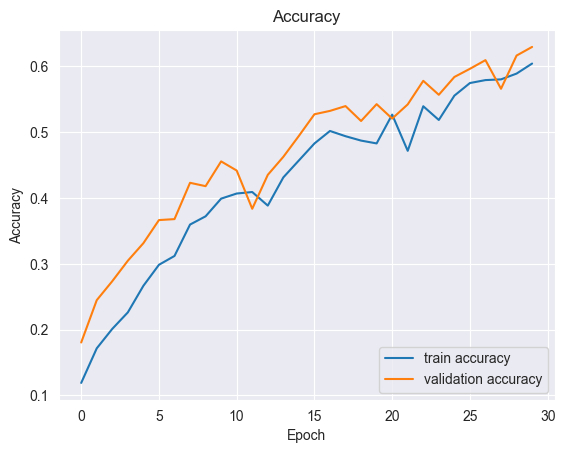

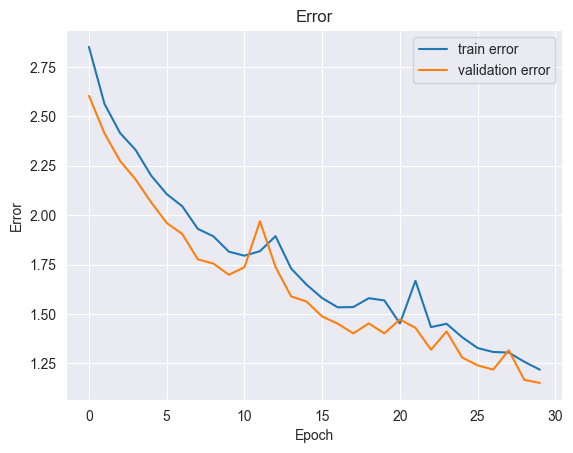

In [9]:
model_wrapper.plot_history(history)

86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
Accuracy :  0.6295213737668981
[19  2  7 ...  7  1  1]
[19  2  7 ...  7  1  9]


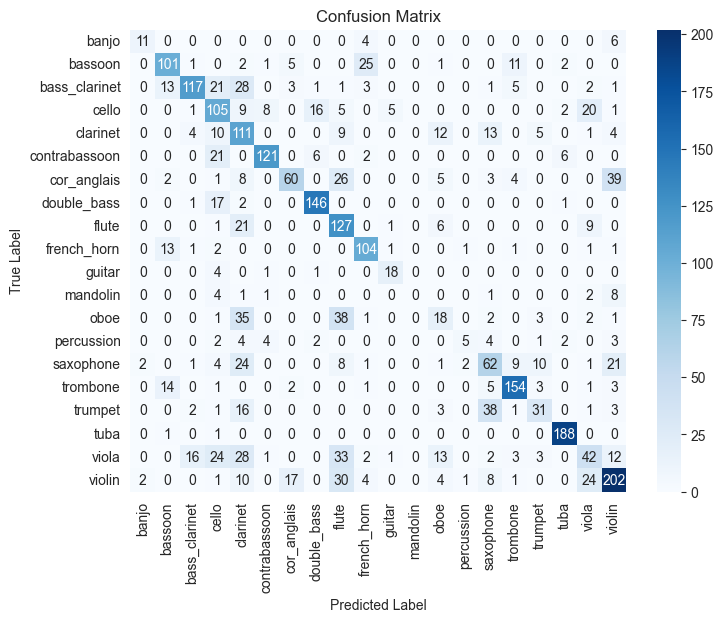

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [10]:
from keras.src.utils import to_categorical
from sklearn.metrics import recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
import seaborn as sns
y_pred = model_wrapper.model.predict(X_test)

y_pred_f = []
for y_val in y_pred:
    l = np.argmax(y_val)
    y_pred_f.append(l)
y_pred_f = np.array(y_pred_f)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_f)
print("Accuracy : ", accuracy)
print(y_test)
print(y_pred_f)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_f)



# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Recall: ", recall_score(y_test, y_pred,average=None))
print("Precision: ", precision_score(y_test, y_pred,average=None))
print("F1-Score: ", f1_score(y_test, y_pred, average=None))